## TUTORIAL: LIMPIEZA DE DATOS CON PYTHON Y PANDAS

### 1. PROBLEMAS DE NEGOCIO

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no  en adquirir  un certificado de depósito a término con el banco.

¿Qué perfil tienen lo clientes con mayor potencial de conversión?

### 2. SET DE DATOS

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

Cada registro contiene 16 caracteristicas (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age": edad (numérica)
2. "job": tipo de trabajo (categórica: "admin", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary" "primary" "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene crédito de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue coontactado (categórica: "unknown", "telephone", cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durate la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior ( categórica: "unknown", "other", "failure", "success")
17. "y": categórica ¿el cliente se suscribió a un depósito a término?  (categórica: "yes", "no")

### 3. IMPORTANDO LIBRERIAS Y MIRANDO EL SET DE DATOS

In [46]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ruta= "Archivos/dataset_banco.csv"
data= pd.read_csv(ruta)


In [47]:
print(data.shape) #(cantidad de registros, cantidad de columnas)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [48]:
# OBSERVANDO LOS TIPOS DE VARIABLES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


Generalmente cuando `Dtype` es object nos estamos refiriendo a una variable de tipo categórica.

### 4. LIMPIEZA DE DATOS

Realizaremos el proceso de limpieza de datos, teniendo en cuenta las situaciones mas comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que qeuremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos `íntegro`, listo para la fase de `Análisis Exploratorio`

### 4.1 Datos Faltantes

Acá comenzamos a ver que los datos no están completos, pes no todas las columnas tienen la misma cantidad de registros.

El número total de registros  debería ser  45 215. Sin embargo columnas como "job", "marital", "education", "balance, "duration" y "pdays", no tienen esa cantidad.

Por ser ta pocos los datos falantes optaremos por eliminarlas filas correspondientes.


In [49]:
# ELIMINANDO DATOS FALTANTES
data.dropna(inplace=True) # inplace=True sobreescribe sobre la misma data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


### 4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

* `Una columna que no contiene información relevante para el problema que quetemos resolver`. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)

* `Una columna categórica pero con un solo nivel`. Por ejemplo, si en la columna "job" solo tubviésemos el nivel "unknown".

* `Una columna numérica pero con un solo valor`. Por ejemplo, si en la columna "edad" todos los valores fuesen iguales a 50.

* `Columna con información redundante`. Por ejemplo, si además de las columnas "month" y "day", tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de que si alguna columna puede ser relevante o no, lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se  debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un solo nivel, o columnas numéricas con un solo valor:

A continuación chequeamos si las columnas categoricas o numericas tienen un solo valor, de ser asi, sería una columna irrevelante en el modelo y procedemos a eliminarla.

In [50]:
# Conteo de los niveles en las diferentes columnas  categóricas.
cols_cat= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} niveles')

# Cuenta la cantidad de niveles hay por columnas 
# Si existe un unico nivel la columna categorica se puede eliminar

Columna job: 18 niveles
Columna marital: 6 niveles
Columna education: 10 niveles
Columna default: 2 niveles
Columna housing: 2 niveles
Columna loan: 6 niveles
Columna contact: 5 niveles
Columna month: 12 niveles
Columna poutcome: 6 niveles
Columna y: 2 niveles


Todas las columnas categóricas tienen más de un nivel. No eliminamos ninguna.

Para analizar si en las columnas numéricas existe 'un unico valor' usaremos describe(). Si la desviación estandar es igual a cero, significa que existe un unico valor en cada celda de esa columna.

In [51]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Como se puede ver las `std` en las distintas columnas difieren de cero, por tanto, los valores numericos son diversos... por lo que no se debe eliminar ninguna de las columnas.

### 4.3 Filas repetidas

In [52]:
print(f"Tamaño del set de datos antes de eliminar las filas repetidas: {data.shape}")
data.drop_duplicates(inplace=True) # Deja solo la fila original y elimina las repetidas y sobre escribe el resultado en el set de datos original
print(f"Tamaño del set de datos después de eliminar las filas repetidas: {data.shape}")

Tamaño del set de datos antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set de datos después de eliminar las filas repetidas: (45203, 17)


### 4.4 Outliers en las variables numéricas

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas de tipo `"boxplot"` de las columnas numéricas:

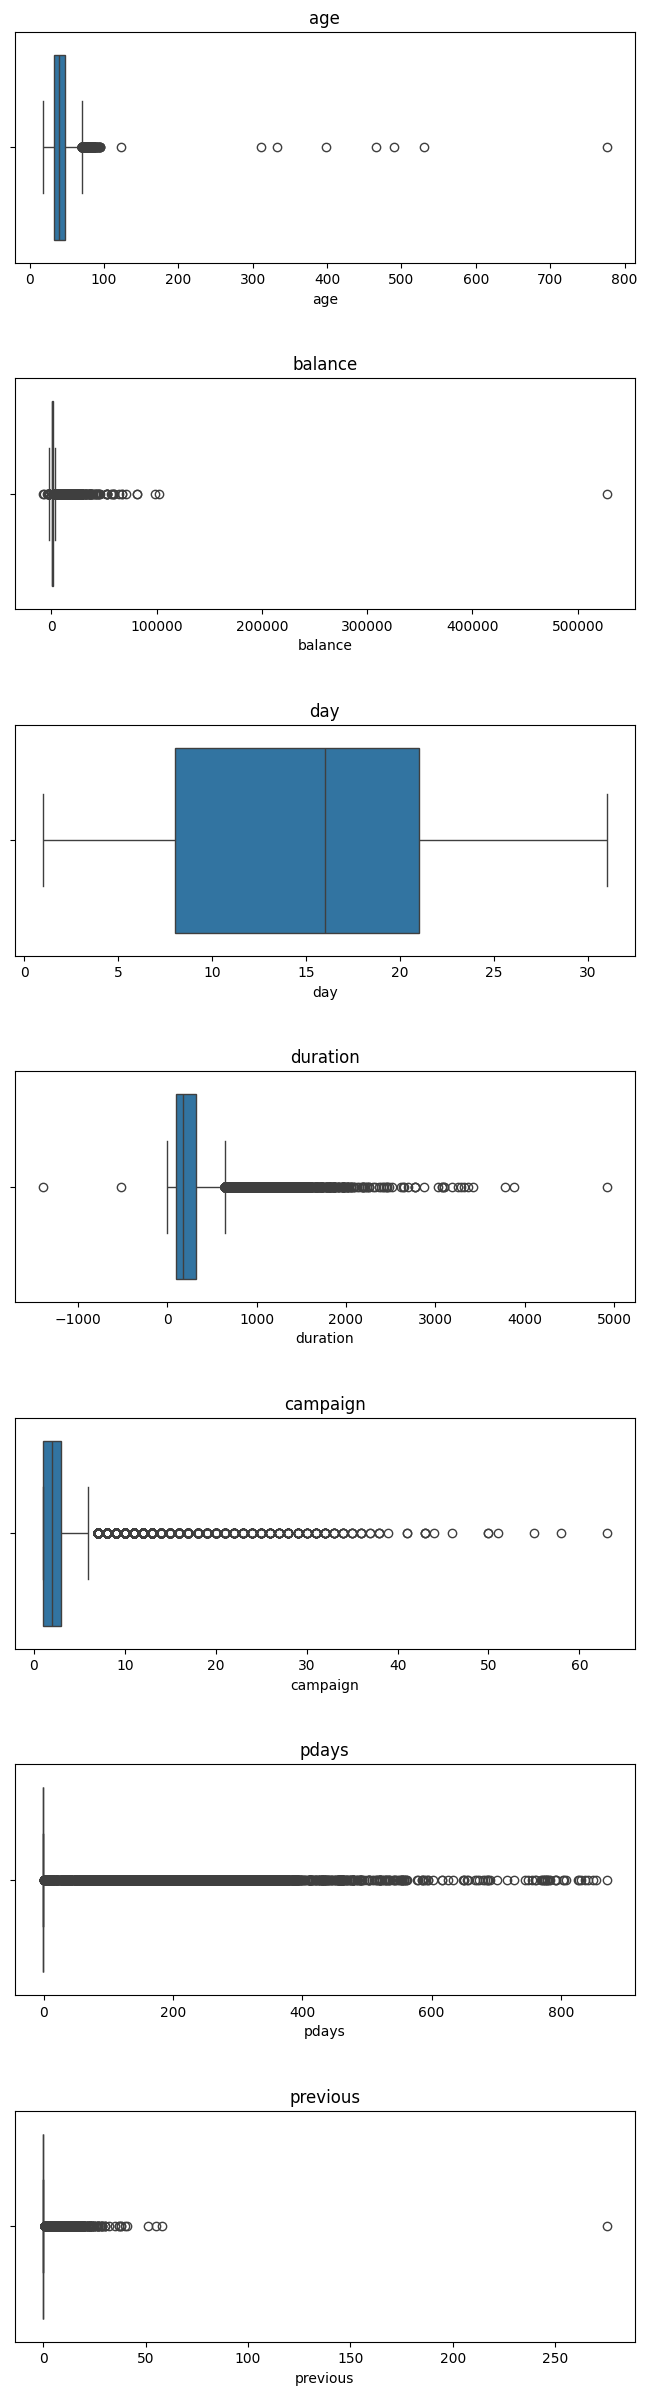

In [53]:
# Generar gráficas individuales para cada una de las variables o columnas numéricas

cols_num= ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax= plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

#### Observaciones:
* `"age"`: Hay sujetos con edades mucho mayores a los 100 años.
* `"duration"`: Hay valores negativos.
* `"previus"`: Hay un valor extremadamente alto (cercano a 300).
* `"pdays"`: Hay valores negativos.

In [54]:
# Eliminar filas con edades mayores de 100 ("age">100)
print(f"Tamaño del set antes de eliminar registros de edad: {data.shape}")
data= data[data['age']<=100]
print(f"Tamaño del set después de eliminar registros de edad: {data.shape}")

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [55]:
# Eliminar filas que tengan duraciones de llamadas negativas ("duration<0")
print(f"Tamaño del set antes de eliminar registros de duración: {data.shape}")
data= data[data['duration']>0]
print(f"Tamaño del set después de eliminar registros de duración: {data.shape}")

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45190, 17)


In [56]:
# Eliminar filas con mas de 100 llamadas ("previous">100)
print(f"Tamaño del set antes de eliminar registros de previous: {data.shape}")
data= data[data['previous']<=100]
print(f"Tamaño del set después de eliminar registros de previous: {data.shape}")


Tamaño del set antes de eliminar registros de previous: (45190, 17)
Tamaño del set después de eliminar registros de previous: (45189, 17)


### 4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como `'unknown'` y `'UNK'` que para nosotros son equivalentes pero para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles.

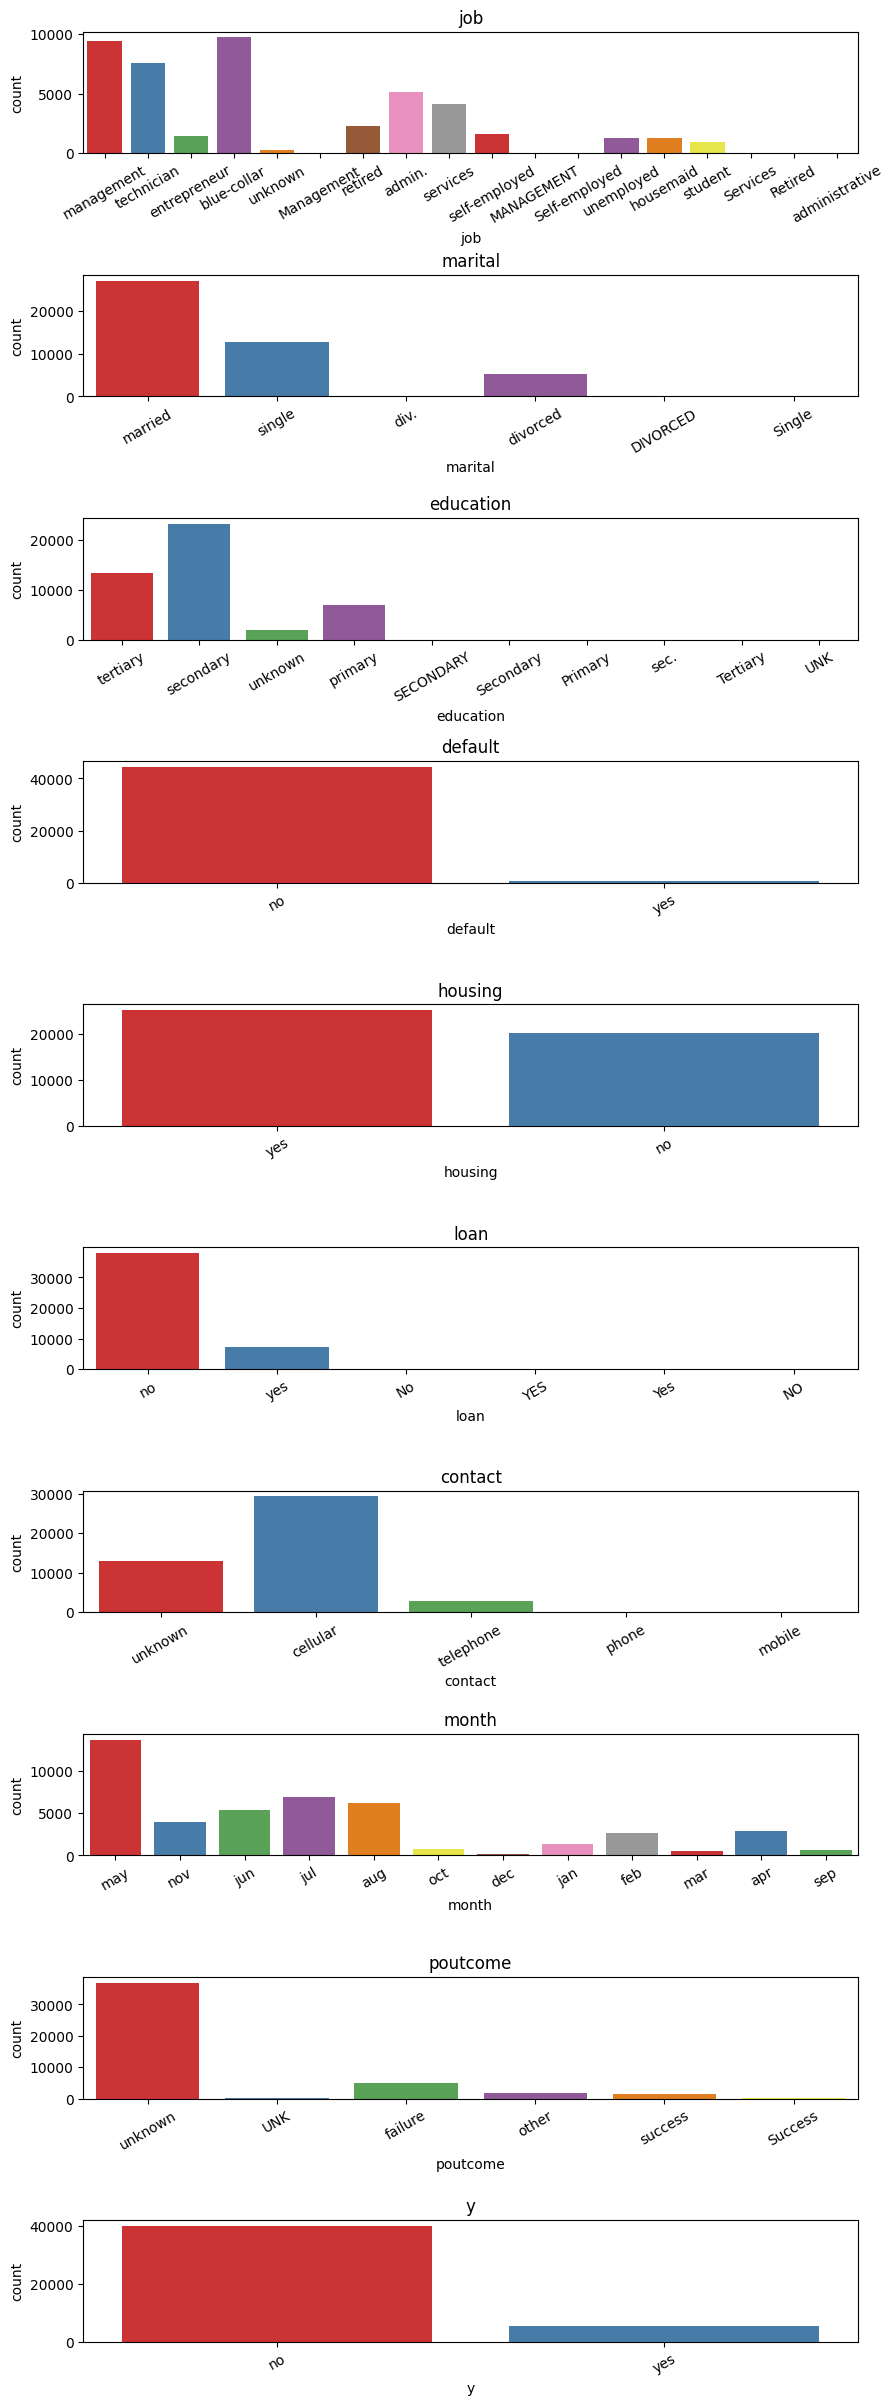

In [57]:
cols_cat= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax= plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data, ax=ax[i], hue=col, palette='Set1', legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=30)
    #ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente.

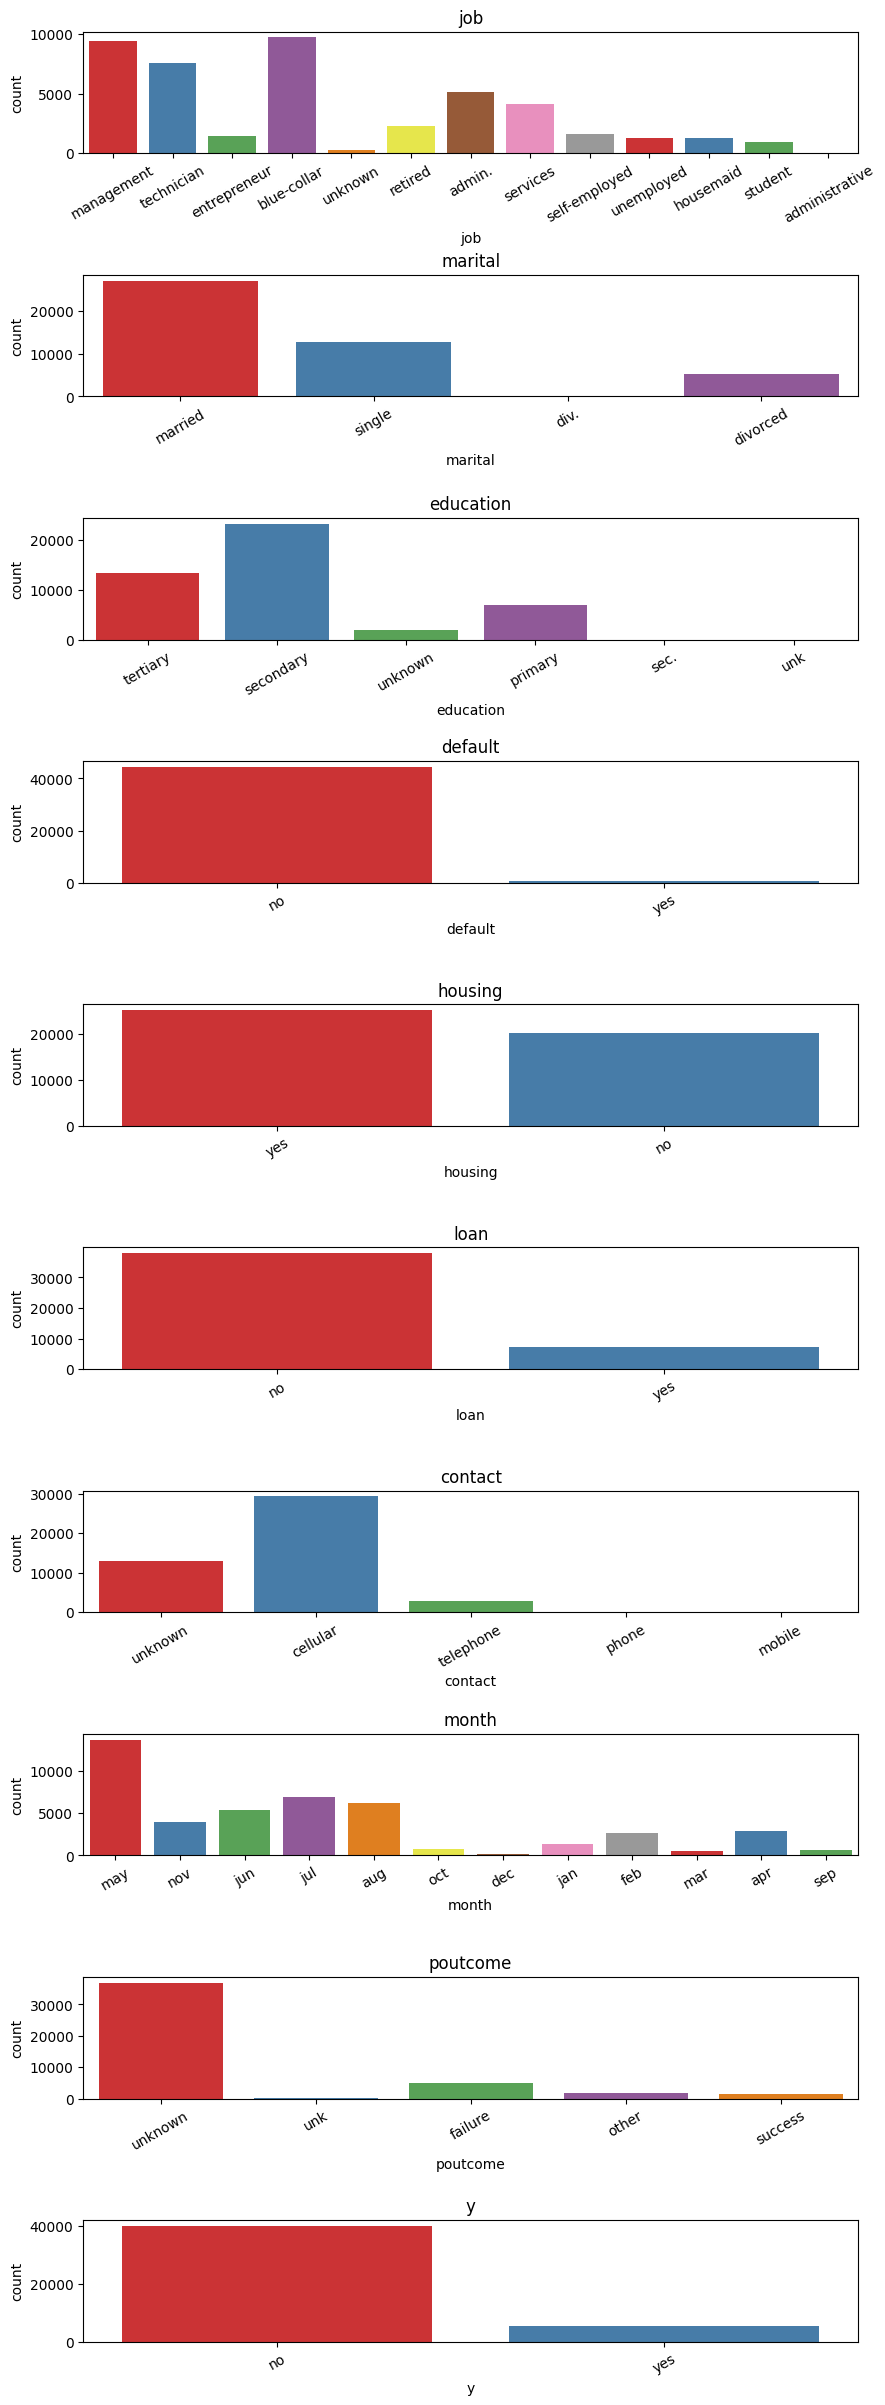

In [58]:
for column in data.columns:
    if column in cols_cat:
        data[column]= data[column].str.lower() # lo lleva todo a minúscula

# Generemos la gráfica nuevamente
fig, ax= plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data, ax=ax[i], hue=col, palette='Set1', legend=False)
    ax[i].set_title(col)
    #ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
    ax[i].tick_params(axis='x', rotation=30)

Hacemos un analisis columna por columna para unificar los sub-niveles en un único valor

In [59]:
# job: unificar 'admin.' y 'administrativo'
print(data['job'].unique())
data['job']=data['job'].str.replace('admin.','administrative', regex =False) # Como se hace un reemplazo de todo el literal, no se usan expresiones regulares (regex= False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [60]:
# marital: unificar 'div.' y 'divorced'
print(data['marital'].unique())
data['marital']=data['marital'].str.replace('div.','divorced', regex =False) # Como se hace un reemplazo de todo el literal, no se usan expresiones regulares (regex= False)
print(data['marital'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [61]:
# education: unificar 'sec.' y 'secondary, 'unk' y 'unknown'
print(data['education'].unique())
# Reemplazar 'sec.' con 'secondary'
data['education'] = data['education'].str.replace('sec.', 'secondary', regex=False)
# Reemplazar 'unk' con 'unknown' utilizando pd.NA para manejar valores nulos correctamente
data['education'] = data['education'].replace('unk', 'unknown')

print(data['education'].unique())



['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [62]:
# contact: unificar 'telephone' y 'phone'
print(data['contact'].unique())
data['contact']=data['contact'].replace('phone','telephone') 
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone' 'mobile']


In [63]:
# poutcome: unificar 'unk' y 'unknown'
print(data['poutcome'].unique())
data['poutcome']=data['poutcome'].replace('unk','unknown') 
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [64]:
data.shape

(45189, 17)

In [65]:
ruta= "Archivos/dataset_banco_clean.csv"
data.to_csv(ruta, index=False)


#### ¡Ya se realizó la limpieza del set de datos!.

Originalmente tenía 45 215 registros y 17 columnas. El dataset resultante tiene 45 189 registros (26 menos) con 17 columnas.

#### `Ya el set de datos está listo ara el análisis exploratorio.`

### 5. ANÁLISIS EXPLORATORIO

#### EL PROBLEMA DE NEGOCIO
¿Qué perfil tienen los clientes con mayor potencial de conversión?

#### EL SET DE DATOS DESPUÉS DE LA LIMPIEZA

Cada registro contiene 16 acaracterísticas (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto)

#### LECTURA DEL DATASET

In [67]:
# Cargar el archivo CSV
ruta = "Archivos/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

# Reemplazar 'unknown' con NaN para manejarlos más fácilmente
data.replace('unknown', pd.NA, inplace=True)

# Convertir las columnas usando pd.to_numeric() con errors='coerce'
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['balance'] = pd.to_numeric(data['balance'], errors='coerce')
data['day'] = pd.to_numeric(data['day'], errors='coerce')
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')
data['campaign'] = pd.to_numeric(data['campaign'], errors='coerce')
data['pdays'] = pd.to_numeric(data['pdays'], errors='coerce')
data['previous'] = pd.to_numeric(data['previous'], errors='coerce')

# Manejar los NaN antes de convertir a int64
data['age'] = data['age'].fillna(0).astype('int64')
data['day'] = data['day'].fillna(0).astype('int64')
data['campaign'] = data['campaign'].fillna(0).astype('int64')
data['previous'] = data['previous'].fillna(0).astype('int64')

# Revisar la información del DataFrame
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        44901 non-null  object 
 2   marital    45189 non-null  object 
 3   education  43332 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    32178 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   8246 non-null   object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#### ANÁLISIS EXPLORATORIO

La idea es usar herramientas estadísticas y de visualización para:

* Crear un mapa mental del set de datos (entender los datos)
* Empezar a encontrar respuestas a la pregunta inicial (¿Qué perfin tienen los clientes con mayor potencialidad en comprar el producto?)

Llevaremos a cabo estas fases:
1. Análisis de cada vriable de manera individual.
2. Análisis univariado: Realación de cada varaible preccictora con la variable a predecir.
3. Análisis bivariado: Relación de pares de variables predictora con la variable a predecir.

##### 5.1 ANALISIS DE CADA VARIABLE PREDICTORA DE MANERA INDIVIDUAL

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        44901 non-null  object 
 2   marital    45189 non-null  object 
 3   education  43332 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    32178 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   8246 non-null   object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


Generando gráficos de barras para ver las variables categoricas y en cuantas sub-categorías están divididas.

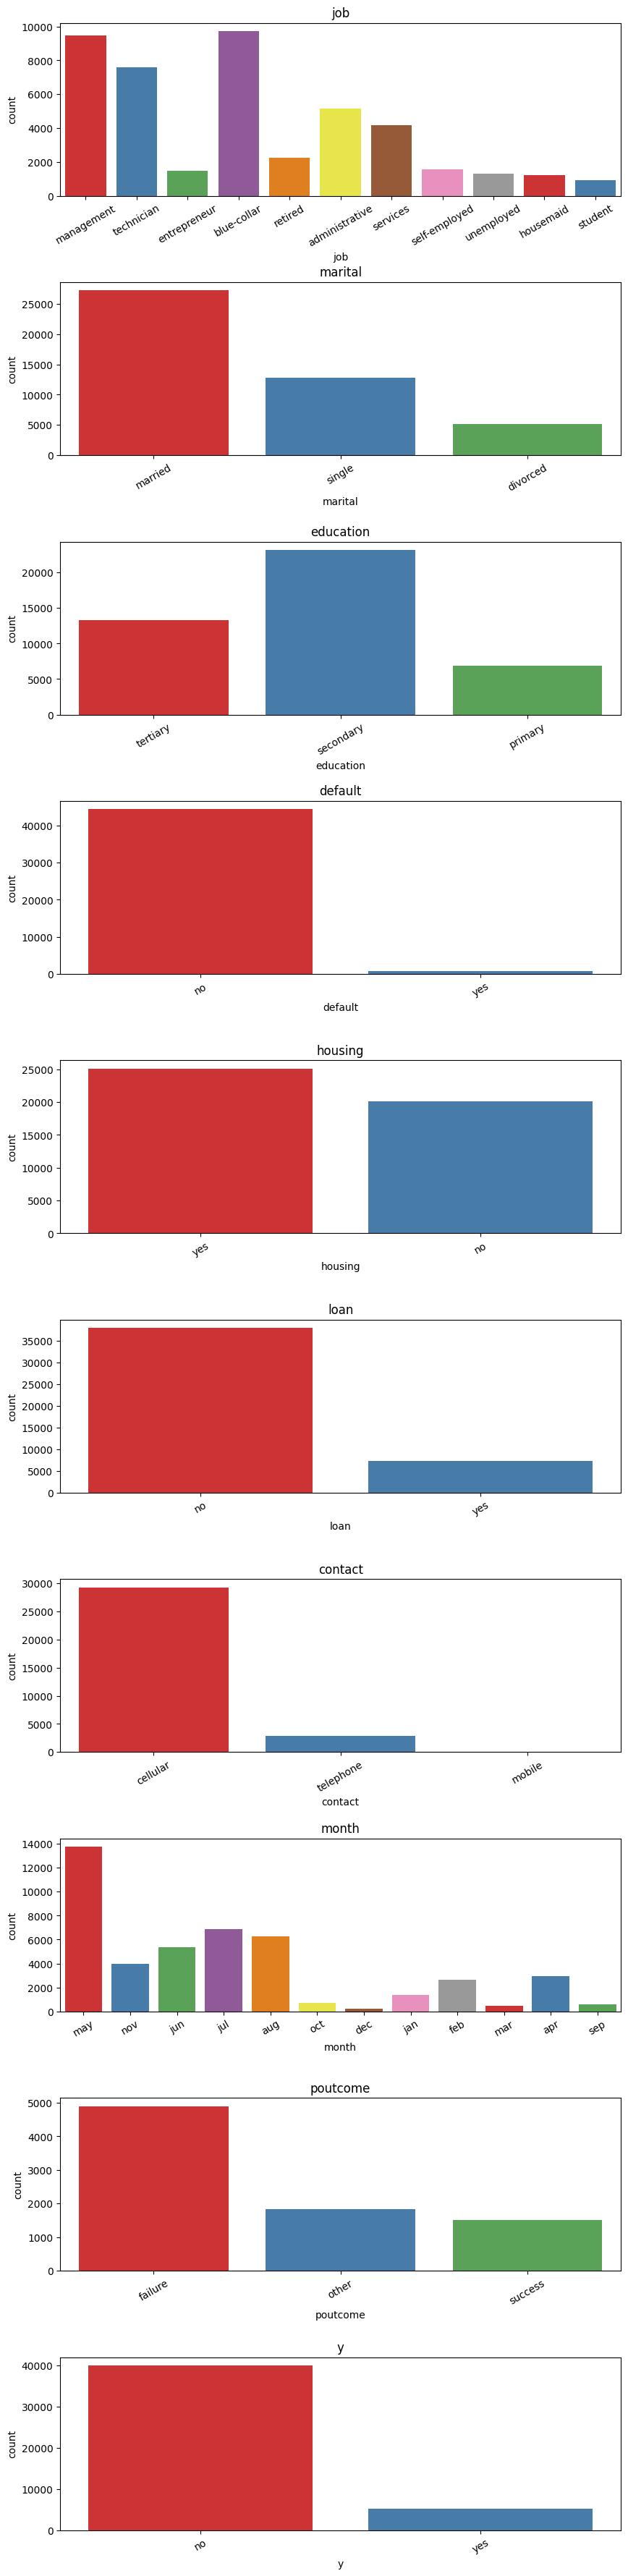

In [69]:
cols_cat= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax= plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data, ax=ax[i], hue=col, palette='Set1', legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=30)


`Observaciones:`

**Niveles de cada variable de interés:**
* 'job': 11
* 'marital': 3
* 'education': 3
* 'default': 2
* 'housing': 2
* 'loan': 2
* 'contact': 3
* 'month': 12
* 'poutcome': 3
* 'y': 2   

**Eliminemos las variables que no resultan relevantes para el problema del negocio, pues no aportan información sobre el cliente**

In [70]:
data.drop(columns=['contact','month','day','duration','campaign','pdays','previous'], inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

Mostramos a continuación la variables **numéricas**

In [71]:
data.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


Dibujando **histogramas** de las variables numéricas:

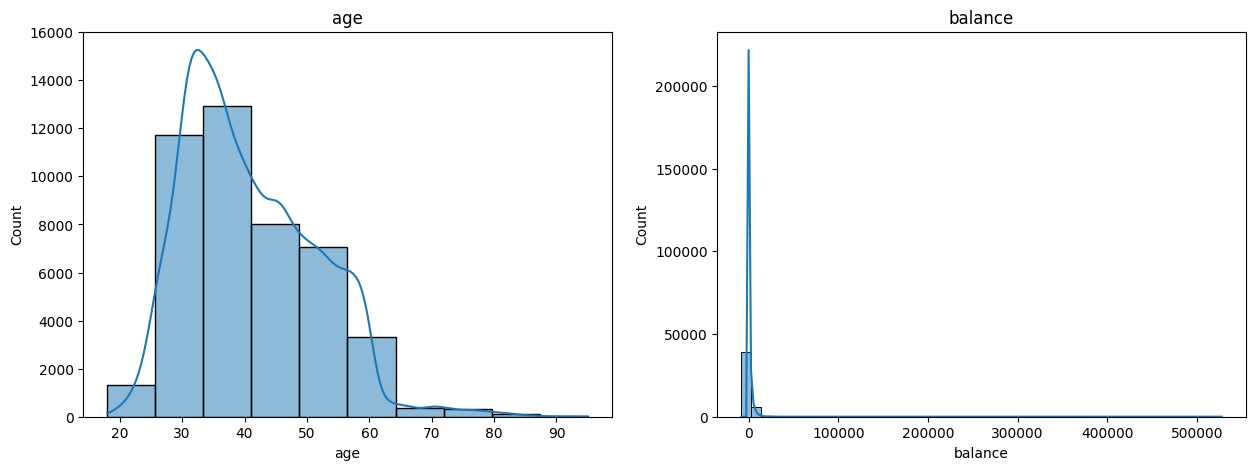

In [72]:
col_num= ['age','balance']

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)
for i,col in enumerate(col_num):
    if col=='age':
        nbins=10
    else:
        nbins=50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)            
        

Veamos en detalles que es lo que ocurre con el **balance**

In [73]:
data['balance'].describe()

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

`Observaciones:`
* La mayor parte del grupo contactado tiene edades entre los 30 y los 50 años, con sesgo hacia los 30-40 años.
*  La mayor parte del grupo contactado (75%) tiene saldos o negativos o que no superan los 1500 euros aproximadamente.


##### 5.2 ANALISIS UNIVARIADO

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('age','balance','job','marital','education',etc) y la variable a predecir ('y').

Esto se conoce como **analisis univariado**

`ADVERTENCIA`

Este análisis nos mostrará solo una faceta de las posibles relaciones entre cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.

In [74]:
diccionario={'yes':1, 'no':0}

binario= data['y'].map(diccionario)
data['y_bin']= binario

# 'map' aplica el 'diccionario' a cada valor de la columna 'y', cambiando el valor de 'yes' por '1' y 'no' por '0'
# data['y_bin']=binario, crea una  ueva columna 'y_bin' y almacena los valores obtenidos en el paso anterior.
# De esta forma resulta facil calcular la tasa de conversión: el promedio de la columna 'y_bin'

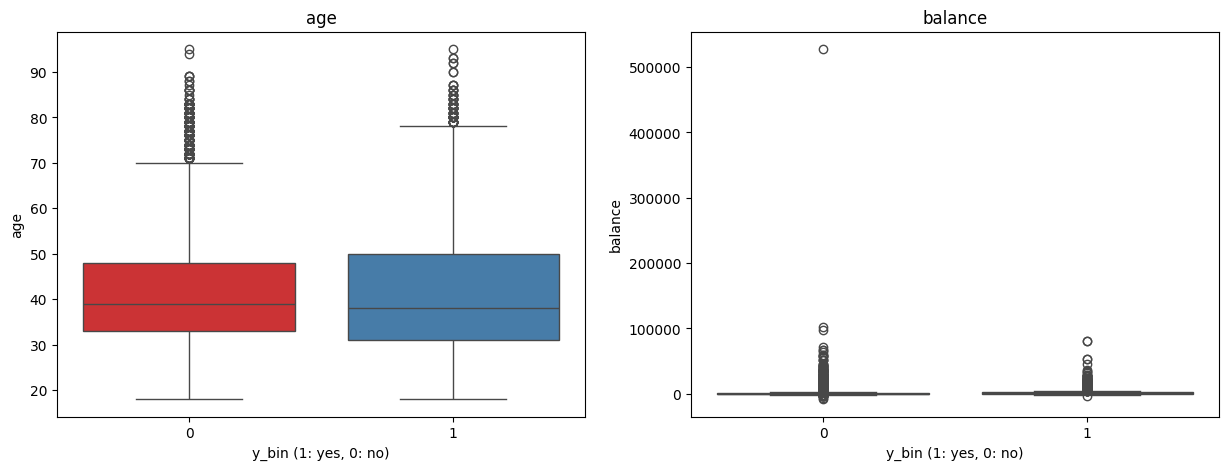

In [75]:
#Relación entre las variables numéricas y las variables a predecir

col_num = ['age', 'balance']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.25)

# Crear los boxplots
for i, col in enumerate(col_num):
    sns.boxplot(x='y_bin', y=col, data=data, ax=ax[i], palette='Set1', hue='y_bin', dodge=False)
    ax[i].set_xlabel('y_bin (1: yes, 0: no)')
    ax[i].set_title(col)

for axis in ax:
    axis.get_legend().remove() # Oculta la leyenda
#plt.legend([], [], frameon=False)  # Oculta la leyenda
plt.show()

* Vemos de forma visual que, inicialmente, en terminos de 'age' no hay diferencias significativas' en la 'adquisición del producto' o 'no'.
* En el caso de 'balance' tampoco hay una diferencia improtante en 'quienes adquirieron el producto' y 'quienes no lo adquirieron'
Sin embargo estas variables numéricas se encuentran en un amplio rango.
Podemos calcular las tasas de conversión definiendo intervalos para estas variables numéricas y ver si podemos extraer información relevante de ese análisis.

##### **Funcion para graficar tasas de conversión:**

In [86]:
def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y= var_predictora, var_predecir
    
    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo= data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()
    
    # Y generar gráfica
    if type=='line':   # Útil para rangos contínuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo) # En 'var_predictora' se pudiera poner 'x'
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, hue='tasa_conv',palette='Set1', order=order)
        plt.grid()
        plt.legend([],[], frameon=False)  # Ocultar la leyenda
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
        
    """data.groupby(x)[y].mean().mul(100) devuelve una Serie en lugar de un DataFrame.
       reset_index() transforma grupo en un DataFrame que tenga var_predictora como índice y tasa_conv como columna:
    """
        

**Graficando columna 'age'**

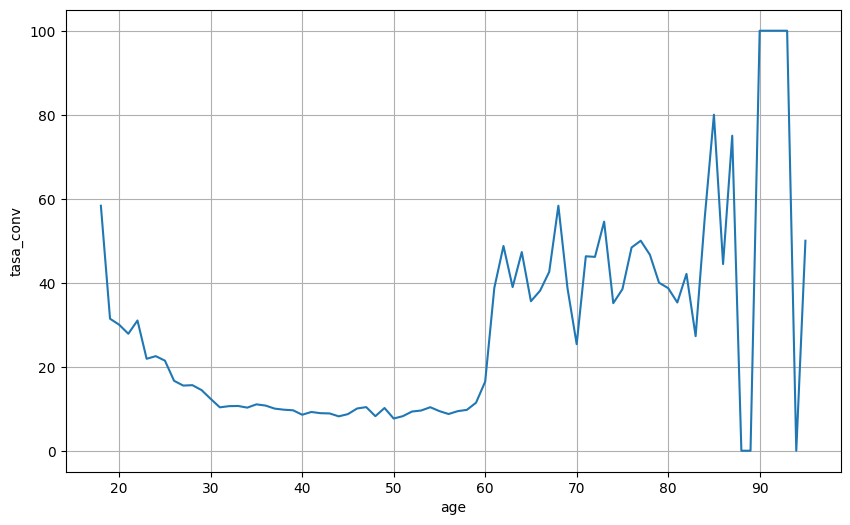

In [32]:
graficar_tasas_conversion('age','y_bin')

`Observaciones:`

* En este caso **SI** se observan diferencias en las tasas de conversión por edad.
* Podríamos establecer tres rangos aproximados: 18-25 años, 26-59 años y 60 años en adelante.

Teniendo en cuenta el resultado anterior y para ir simplificando el problema, creemos subgrupos de edades y calculemos las tasas de conversión en cada caso:
crearemos una nueva columna en el dataset llamada: **'grupos_edad'**

In [77]:
data.loc[:,'grupos_edad']="18-25"
data.loc[data['age']>60,'grupos_edad']=">60"
data.loc[(data['age']>25) & (data['age']<=60), 'grupos_edad'] = "26-60"

Graficamos la tasa de conversión para la nueva columna creada 'grupos_edad'

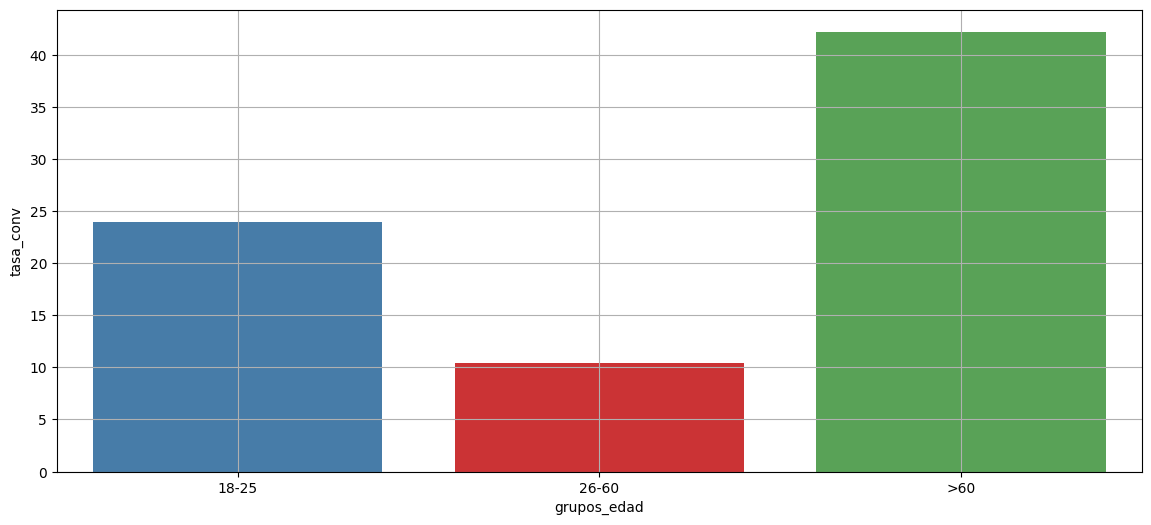

In [78]:
graficar_tasas_conversion('grupos_edad','y_bin',type='bar')

`Observaciones:`
* tenemos tres rangos de edades bastante diferenciados y para los cuales se alcanzan diferentes tasas de conversión: 18-25 años (24%), 26-60 años (11%), más de  60 años (43%)

Para seguir con el análisis exploratorio y tener definido los grupos de edades podemos eliminar de nuestro set de datos la columna 'age'

In [79]:
data.drop(columns=['age'], inplace=True)

Ahora vamos a realizar el mismo análisis pero para la variable 'balance'

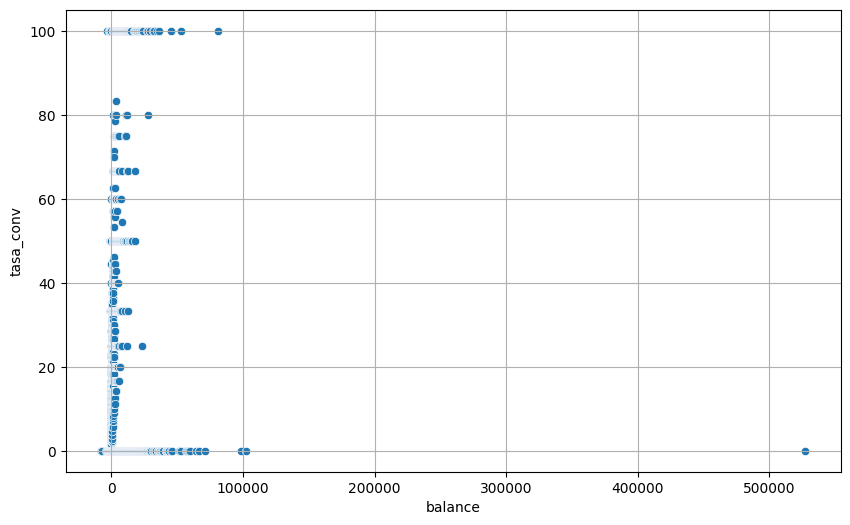

In [80]:
graficar_tasas_conversion('balance', 'y_bin', type='scatter')

De igual manera se trabaja con las tasas de conversión pero en el caso de los saldos **'balance'**, como en el grafico anterior de dispersión no esta claro la 'tasa de conversion', se aplica la misma estrategia de dividir por rango de saldos.

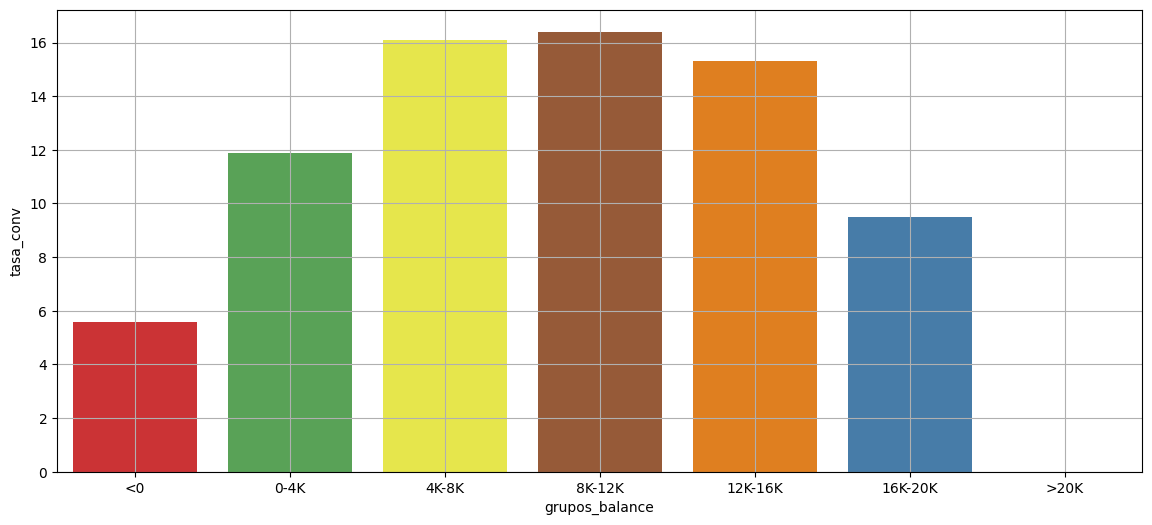

In [81]:
# No resulta facil ver un patron al igual que con la edad generamos
# diferentes rengos:
# <0
# 0 - 4000
# 4000 - 8000
# 8000 - 12000
# 12000 - 16000
# 16000 - 20000
# >20000

# Creamos una nueva columna en el dataset: "grupos_balance"
data.loc[:,'grupos_balance']="<0"
data.loc[(data['balance']>=0) & (data['balance']<4000),'grupos_balance']="0-4K"
data.loc[(data['balance']>=4000) & (data['balance']<8000),'grupos_balance']="4K-8K"
data.loc[(data['balance']>=8000) & (data['balance']<12000),'grupos_balance']="8K-12K"
data.loc[(data['balance']>=12000) & (data['balance']<16000),'grupos_balance']="12K-16K"
data.loc[(data['balance']>=16000) & (data['balance']<20000),'grupos_balance']="16K-20K"
data.loc[(data['balance']>=20000), 'grupos_balance']=">20K "

# Y graficamos la tasa de concersion para esta nueva columna
# graficar_tasas_conversion('grupos_balance', 'y_bin', type='bar')

# Aqui establecemos un orden como cuarto argumenteo de la fucnión:

orden=['<0','0-4K','4K-8K','8K-12K','12K-16K','16K-20K','>20K']

graficar_tasas_conversion('grupos_balance', 'y_bin', type='bar', order=orden)

De este resultado se pueden sacar varias conclusiones:
* Mientras mas dib¡nero tiene la persona, mas posibilidades de adquirir el producto, con algunas excepciones como se puede observar, 16K-20K y >20K
* Se observa el siguiente patrón:
  * <0: 5.8%
  * 0-4K: 11.9%
  * 4K-8K: 16.3%
  * 8K-12K: 16.8%
  * 12K-16K: 15.1%
  * 16K-20K: 9.7%
  * '>20K': 0%

* Podriamos definir  3 rangos de interes para simplificar el análisis:
  * <0
  * 0-4K
  * 4K-16K
  * 16K-20K

**Generando los nuevos Grupos**

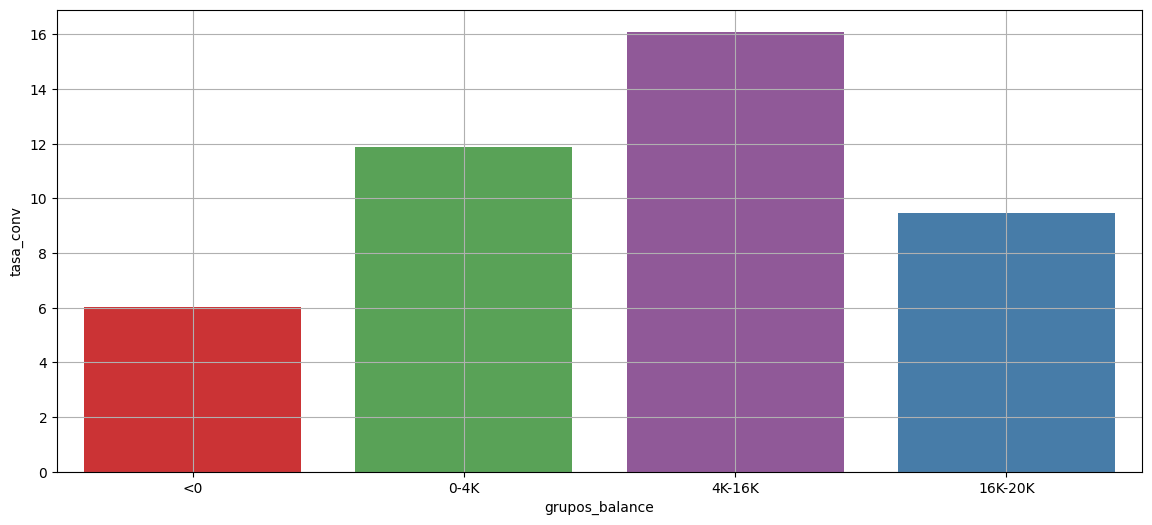

In [83]:
# La nueva columna en el dataset se llamará: "grupos_balance"
data.loc[:,"grupos_balance"]="<0"
data.loc[(data["balance"]>=0) & (data["balance"]<4000),'grupos_balance']="0-4K"
data.loc[(data["balance"]>=4000) & (data["balance"]<16000),'grupos_balance']="4K-16K"
data.loc[(data['balance']>=16000) & (data['balance']<=20000),'grupos_balance']="16K-20K"

orden=['<0','0-4K','4K-16K','16K-20K']

graficar_tasas_conversion('grupos_balance', 'y_bin', type='bar', order=orden)

**Obervaciones:**

En cuanto a los saldos de balance los que tienen mayor potencial de conversión:

Son los de 0 -4000 y de 4000-16000, siendo los menos potencial los saldos negativos y de 16000 a 2000.

Eliminamos la columna 'balance' porqu ya no  nos hace falta para el estudio al lograr simplificar el análisis.

In [84]:
data.drop(columns=['balance'], inplace=True)

Ahora realizaremos un análisis similar pero para las **'Variables Categóricas'**

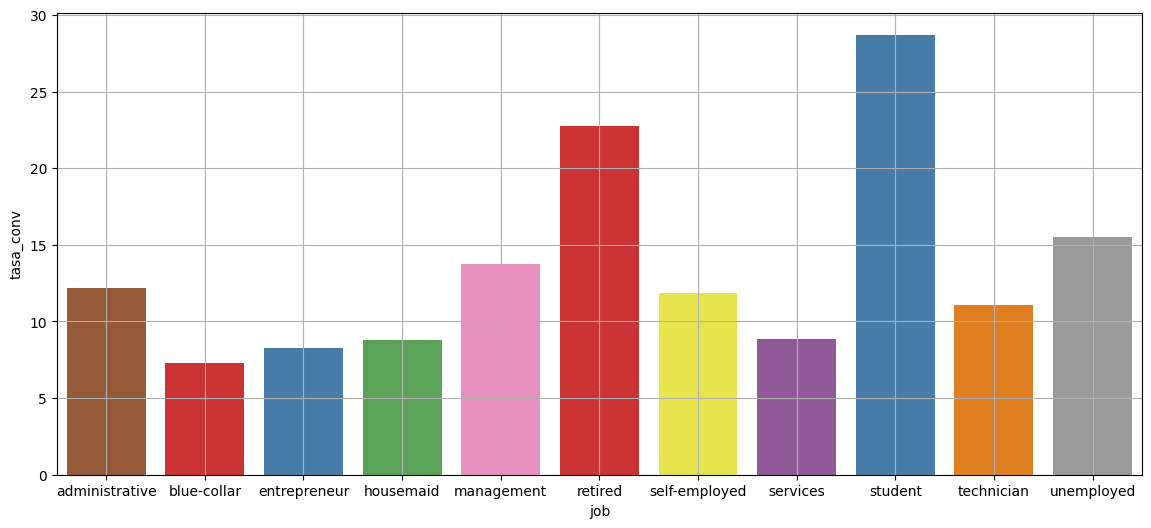

In [87]:
graficar_tasas_conversion('job','y_bin',type='bar')